In [1]:
# 필요한 라이브러리를 불러옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import os

In [2]:
# 지정 폴더의 모든 파일을 불러옵니다.
folder = './data/'
files = os.listdir(folder)

In [3]:
# 불러온 csv 파일들을 하나의 DataFrame으로 합치기
df = pd.DataFrame()
for i in files:
    data = pd.read_csv(folder + i)
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True)

In [4]:
# 풀러온 데이터 확인
df

,No.,2VF1 B,3VF1 G,4VF1 R,5IR B,6IR G,7IR R,8VF B,9VF G,10VF R,11LMD B,12LMD G,13LMD R,BIN,NAME
0,230,2.273,1.938,1.408,0.009,0.014,0.017,3.183,3.371,2.316,457.3,521.4,622.3,NaN,NaN
1,231,2.239,1.944,1.407,0.009,0.014,0.016,3.133,3.430,2.321,457.5,524.4,622.2,NaN,NaN
2,232,2.193,1.928,1.398,0.009,0.015,0.018,3.159,3.374,2.315,458.2,523.2,621.6,NaN,NaN
3,233,2.269,1.943,1.409,0.013,0.015,0.012,3.138,3.387,2.403,457.3,521.3,622.2,NaN,NaN
4,234,2.233,1.940,1.417,0.014,0.015,0.013,3.057,3.330,2.423,460.1,524.0,622.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33179,89281,2.273,1.927,1.405,0.007,0.006,0.007,3.372,3.608,2.451,458.3,524.0,621.4,31.0,NaN
33180,89282,2.240,1.918,1.404,0.007,0.007,0.006,3.166,3.605,2.416,458.7,525.5,621.1,32.0,NaN
33181,89283,2.247,1.933,1.403,0.007,0.007,0.006,3.121,3.484,2.421,458.4,524.8,620.7,32.0,NaN
33182,89284,2.265,1.920,1.397,0.007,0.007,0.007,3.298,3.399,2.406,457.9,524.0,621.4,31.0,NaN


In [5]:
# 불필요한 column을 삭제. No, BIN, NAME
df1 = df.drop(columns=["2VF1 B", "3VF1 G", "4VF1 R", "No.", " BIN", "NAME"])

In [6]:
# 데이터 확인
df1

,5IR B,6IR G,7IR R,8VF B,9VF G,10VF R,11LMD B,12LMD G,13LMD R
0,0.009,0.014,0.017,3.183,3.371,2.316,457.3,521.4,622.3
1,0.009,0.014,0.016,3.133,3.430,2.321,457.5,524.4,622.2
2,0.009,0.015,0.018,3.159,3.374,2.315,458.2,523.2,621.6
3,0.013,0.015,0.012,3.138,3.387,2.403,457.3,521.3,622.2
4,0.014,0.015,0.013,3.057,3.330,2.423,460.1,524.0,622.2
...,...,...,...,...,...,...,...,...,...
33179,0.007,0.006,0.007,3.372,3.608,2.451,458.3,524.0,621.4
33180,0.007,0.007,0.006,3.166,3.605,2.416,458.7,525.5,621.1
33181,0.007,0.007,0.006,3.121,3.484,2.421,458.4,524.8,620.7
33182,0.007,0.007,0.007,3.298,3.399,2.406,457.9,524.0,621.4


In [7]:
# column 이름 변경
df1.columns = ["IR_B", "IR_G", "IR_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R", ]

In [8]:
# 정보 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33184 entries, 0 to 33183
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IR_B    33184 non-null  float64
 1   IR_G    33184 non-null  float64
 2   IR_R    33184 non-null  float64
 3   VF_B    33184 non-null  float64
 4   VF_G    33184 non-null  float64
 5   VF_R    33184 non-null  float64
 6   WD_B    33184 non-null  float64
 7   WD_G    33184 non-null  float64
 8   WD_R    33184 non-null  float64
dtypes: float64(9)
memory usage: 2.3 MB


In [9]:
# 결측치를 제거
df2 = df1.dropna()

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33184 entries, 0 to 33183
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IR_B    33184 non-null  float64
 1   IR_G    33184 non-null  float64
 2   IR_R    33184 non-null  float64
 3   VF_B    33184 non-null  float64
 4   VF_G    33184 non-null  float64
 5   VF_R    33184 non-null  float64
 6   WD_B    33184 non-null  float64
 7   WD_G    33184 non-null  float64
 8   WD_R    33184 non-null  float64
dtypes: float64(9)
memory usage: 2.5 MB


In [12]:
df2.describe()

# max = 5, min = 0으로 이상치가 있음을 확인 할수 있음

,IR_B,IR_G,IR_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
count,33184.000000,33184.000000,33184.000000,33184.000000,33184.000000,33184.000000,33184.000000,33184.000000,33184.000000
mean,0.044563,0.038283,0.057468,3.256241,3.529505,2.473926,445.048508,517.847888,600.377402
std,0.543632,0.481500,0.674085,0.315084,0.227517,0.469683,76.324374,59.622729,112.314406
min,0.005000,0.005000,0.005000,0.357000,3.245000,0.054000,0.000000,0.000000,0.000000
25%,0.007000,0.007000,0.006000,3.133000,3.395000,2.359000,457.600000,524.000000,621.000000
50%,0.008000,0.009000,0.007000,3.188000,3.480000,2.409000,458.000000,524.800000,621.300000
75%,0.009000,0.011000,0.008000,3.262000,3.600000,2.444000,458.400000,525.500000,621.600000
max,10.000000,10.000000,10.000000,5.000000,5.000000,5.000000,461.600000,526.900000,622.600000


In [13]:
# 이상값을 결측치로 대체 후 결측치 제거
# 이상갑 확인후 결측치로 대체
quartile_1 = df2[:].quantile(0.25)
quartile_3 = df2[:].quantile(0.75)
IQR = quartile_3 - quartile_1
lls = (quartile_1 - 1.5 * IQR)
hls = (quartile_3 + 1.5 * IQR)
df3 = df2[(df2[:] > lls) & (df2[:] < hls)]
print(df3)

        IR_B   IR_G   IR_R   VF_B   VF_G   VF_R   WD_B   WD_G   WD_R
0      0.009  0.014    NaN  3.183  3.371  2.316  457.3    NaN  622.3
1      0.009  0.014    NaN  3.133  3.430  2.321  457.5  524.4  622.2
2      0.009  0.015    NaN  3.159  3.374  2.315  458.2  523.2  621.6
3        NaN  0.015    NaN  3.138  3.387  2.403  457.3    NaN  622.2
4        NaN  0.015    NaN  3.057  3.330  2.423    NaN  524.0  622.2
...      ...    ...    ...    ...    ...    ...    ...    ...    ...
33179  0.007  0.006  0.007  3.372  3.608  2.451  458.3  524.0  621.4
33180  0.007  0.007  0.006  3.166  3.605  2.416  458.7  525.5  621.1
33181  0.007  0.007  0.006  3.121  3.484  2.421  458.4  524.8  620.7
33182  0.007  0.007  0.007  3.298  3.399  2.406  457.9  524.0  621.4
33183  0.007  0.007  0.007  3.214  3.379  2.440  458.0  525.3  621.4

[33184 rows x 9 columns]


In [14]:
# 결측치를 제거
df4 = df3.dropna()

In [15]:
# 데이터 확인
df4.describe()

,IR_B,IR_G,IR_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
count,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000
mean,0.008016,0.008276,0.007168,3.196419,3.530111,2.408556,458.063528,525.040508,621.243229
std,0.001217,0.001456,0.001067,0.081339,0.138488,0.060521,0.477687,0.739765,0.383657
min,0.005000,0.005000,0.005000,3.033000,3.246000,2.273000,457.000000,522.400000,620.300000
25%,0.007000,0.007000,0.006000,3.133000,3.425000,2.367000,457.700000,524.500000,621.000000
50%,0.008000,0.008000,0.007000,3.187000,3.511000,2.411000,458.000000,525.100000,621.300000
75%,0.009000,0.009000,0.008000,3.246000,3.622000,2.446000,458.300000,525.600000,621.400000
max,0.011000,0.016000,0.010000,3.455000,3.907000,2.571000,459.500000,526.900000,622.400000


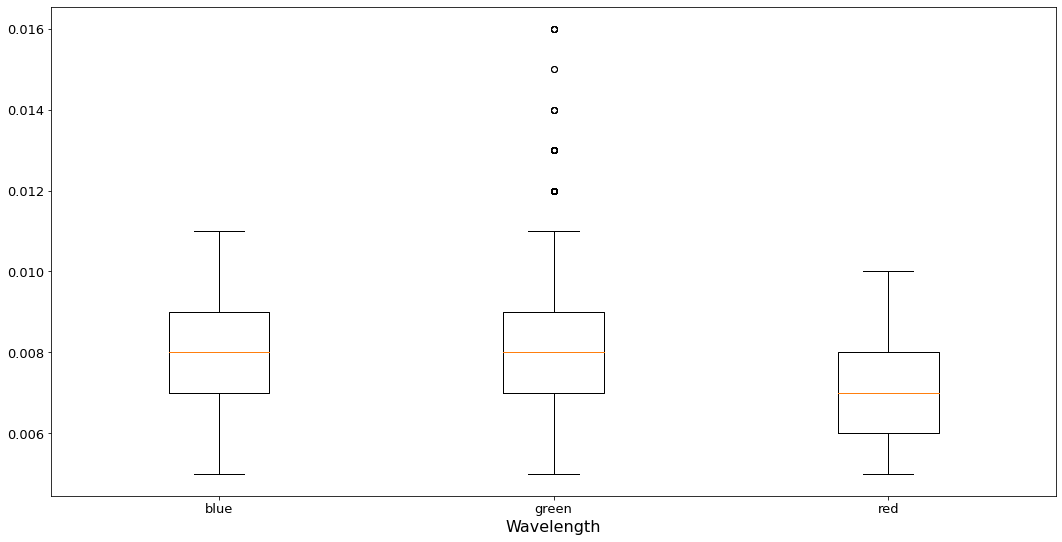

In [17]:
# IR 특성 상자그림
plt.figure(figsize = (18,9))
plt.boxplot([df4['IR_B'],df4['IR_G'],df4['IR_R']], labels = ['blue','green','red'], vert=True)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Wavelength", fontsize = 16)
plt.show()

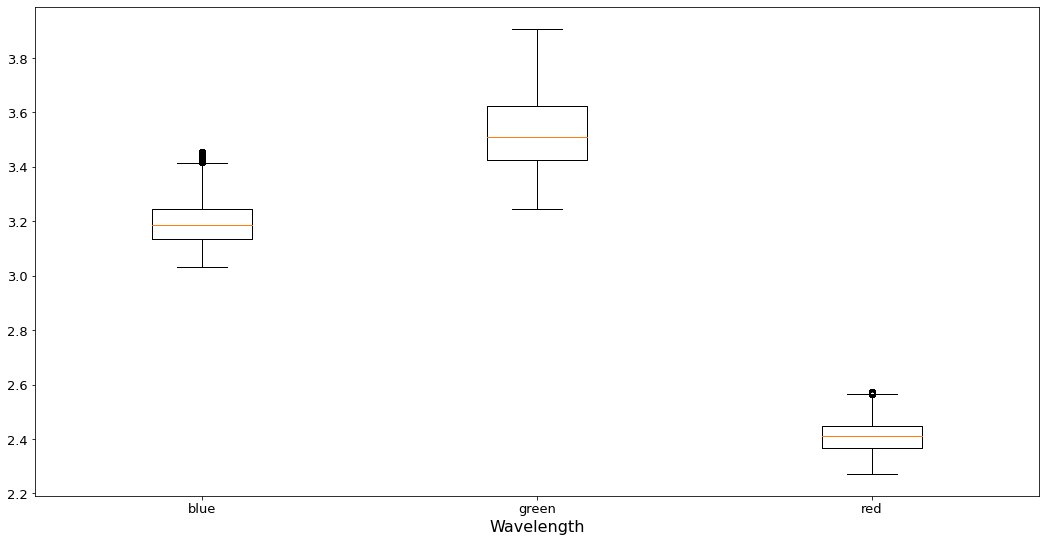

In [18]:
# VF 특성 상자그림
plt.figure(figsize = (18,9))
plt.boxplot([df4['VF_B'],df4['VF_G'],df4['VF_R']], labels = ['blue','green','red'], vert=True)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Wavelength", fontsize = 16)
plt.show()

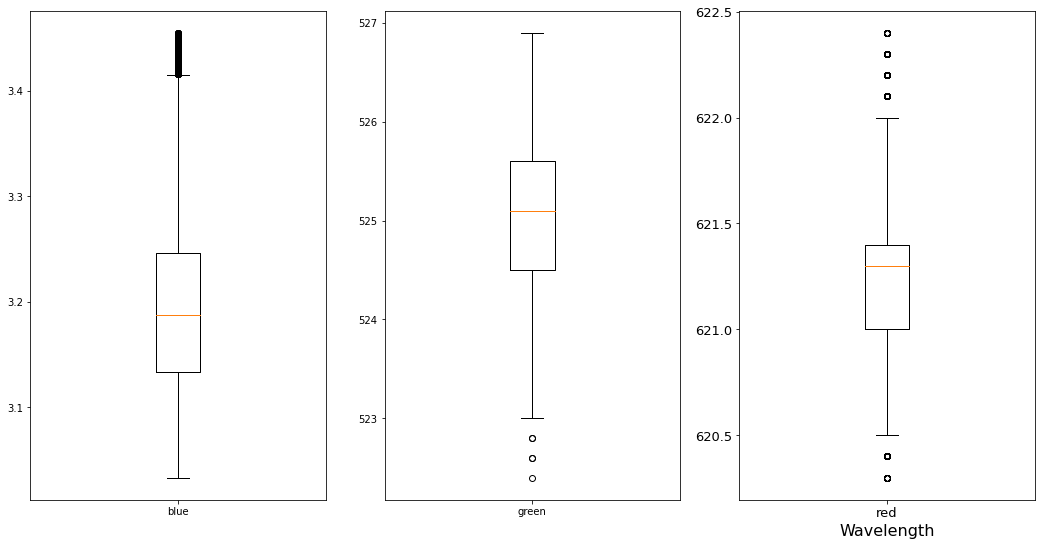

In [19]:
# 파장 특성 상자그림
fig = plt.figure(figsize=(18,9))   # 한 화면의 크기 만들기
ax1 = fig.add_subplot(1,3,1)     # 1행 2열 그림중 1번째
ax2 = fig.add_subplot(1,3,2)     # 1행 2열 그림중 2번째
ax3 = fig.add_subplot(1,3,3)     # 1행 3열 그림중 2번째

ax1.boxplot([df4['VF_B']], labels = ['blue'], vert=True)
ax2.boxplot(df4['WD_G'], labels = ['green'], vert=True)
ax3.boxplot(df4['WD_R'], labels = ['red'], vert=True)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Wavelength", fontsize = 16)
plt.show()

## 공정 능력 확인

In [85]:
# 공정 능력 확인을 위한 spec.이 담긴 file을 불러옴
spec = pd.read_csv('./spec/spec.csv')

In [86]:
# Spec.csv file 내용 확인
spec


,No.,2VF1 B,3VF1 G,4VF1 R,5IR B,6IR G,7IR R,8VF B,9VF G,10VF R,11LMD B,12LMD G,13LMD R
0,Lower,1.900 V,1.800 V,1.300 V,0.000 uA,0.000 uA,0.000 uA,1.000 V,1.000 V,1.000 V,440.0 nm,500.0 nm,600.0 nm
1,Upper,3.000 V,3.000 V,2.000 V,10.000 uA,10.000 uA,10.000 uA,5.000 V,5.000 V,5.000 V,480.0 nm,550.0 nm,650.0 nm


In [87]:
# 파일에 담진 내용이 샘플 데이터와 옹일해서 불필요한 column을 제거
spec1 = spec.drop(columns=["2VF1 B", "3VF1 G", "4VF1 R", "No."])
spec1

,5IR B,6IR G,7IR R,8VF B,9VF G,10VF R,11LMD B,12LMD G,13LMD R
0,0.000 uA,0.000 uA,0.000 uA,1.000 V,1.000 V,1.000 V,440.0 nm,500.0 nm,600.0 nm
1,10.000 uA,10.000 uA,10.000 uA,5.000 V,5.000 V,5.000 V,480.0 nm,550.0 nm,650.0 nm


In [88]:
# column 이름 변경
spec1.columns = ["IR_B", "IR_G", "IR_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R" ]
spec1.index = ["LSL", "USL"]
spec1

,IR_B,IR_G,IR_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
LSL,0.000 uA,0.000 uA,0.000 uA,1.000 V,1.000 V,1.000 V,440.0 nm,500.0 nm,600.0 nm
USL,10.000 uA,10.000 uA,10.000 uA,5.000 V,5.000 V,5.000 V,480.0 nm,550.0 nm,650.0 nm


In [89]:
# 측정 단위 제거
# 측정 결과에는 단위가 없이 float 형태이므로 동일한 형식으로 맞추기 위해 문자 제거후 float형식으로 변경
spec1[:] = spec1[:].replace('uA', '', regex=True)
spec1[:] = spec1[:].replace('V', '', regex=True)
spec1[:] = spec1[:].replace('nm', '', regex=True)
spec1

,IR_B,IR_G,IR_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
LSL,0.000,0.000,0.000,1.000,1.000,1.000,440.0,500.0,600.0
USL,10.000,10.000,10.000,5.000,5.000,5.000,480.0,550.0,650.0


In [90]:
mean = []
avg = df4[:].mean()
mean.append(avg)
spec1 = spec1.append(mean)

In [91]:
spec1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, LSL to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IR_B    3 non-null      object
 1   IR_G    3 non-null      object
 2   IR_R    3 non-null      object
 3   VF_B    3 non-null      object
 4   VF_G    3 non-null      object
 5   VF_R    3 non-null      object
 6   WD_B    3 non-null      object
 7   WD_G    3 non-null      object
 8   WD_R    3 non-null      object
dtypes: object(9)
memory usage: 240.0+ bytes


In [92]:
spec1

,IR_B,IR_G,IR_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
LSL,0.000,0.000,0.000,1.000,1.000,1.000,440.0,500.0,600.0
USL,10.000,10.000,10.000,5.000,5.000,5.000,480.0,550.0,650.0
0,0.008016,0.008276,0.007168,3.196419,3.530111,2.408556,458.063528,525.040508,621.243229


In [93]:
# spec1 = pd.to_numeric(spec1)
# spec.info()

spec1 = spec1[["IR_B", "IR_G", "IR_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R" ]] = spec1[["IR_B", "IR_G", "IR_R", "VF_B", "VF_G", "VF_R", "WD_B", "WD_G", "WD_R" ]].apply(pd.to_numeric)
spec1


,IR_B,IR_G,IR_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
LSL,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,440.000000,500.000000,600.000000
USL,10.000000,10.000000,10.000000,5.000000,5.000000,5.000000,480.000000,550.000000,650.000000
0,0.008016,0.008276,0.007168,3.196419,3.530111,2.408556,458.063528,525.040508,621.243229


In [95]:
spec1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, LSL to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IR_B    3 non-null      float64
 1   IR_G    3 non-null      float64
 2   IR_R    3 non-null      float64
 3   VF_B    3 non-null      float64
 4   VF_G    3 non-null      float64
 5   VF_R    3 non-null      float64
 6   WD_B    3 non-null      float64
 7   WD_G    3 non-null      float64
 8   WD_R    3 non-null      float64
dtypes: float64(9)
memory usage: 240.0+ bytes


In [126]:
# column 이름 변경
spec1.index = ["LSL", "USL", "MEAN"]
spec1

,IR_B,IR_G,IR_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
LSL,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,440.000000,500.000000,600.000000
USL,10.000000,10.000000,10.000000,5.000000,5.000000,5.000000,480.000000,550.000000,650.000000
MEAN,0.008016,0.008276,0.007168,3.196419,3.530111,2.408556,458.063528,525.040508,621.243229


In [127]:
# Spec. data 확인
print(spec1)
print(spec1.info())

           IR_B       IR_G       IR_R      VF_B      VF_G      VF_R  \
LSL    0.000000   0.000000   0.000000  1.000000  1.000000  1.000000   
USL   10.000000  10.000000  10.000000  5.000000  5.000000  5.000000   
MEAN   0.008016   0.008276   0.007168  3.196419  3.530111  2.408556   

            WD_B        WD_G        WD_R  
LSL   440.000000  500.000000  600.000000  
USL   480.000000  550.000000  650.000000  
MEAN  458.063528  525.040508  621.243229  
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, LSL to MEAN
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IR_B    3 non-null      float64
 1   IR_G    3 non-null      float64
 2   IR_R    3 non-null      float64
 3   VF_B    3 non-null      float64
 4   VF_G    3 non-null      float64
 5   VF_R    3 non-null      float64
 6   WD_B    3 non-null      float64
 7   WD_G    3 non-null      float64
 8   WD_R    3 non-null      float64
dtypes: float64(9)
memory usage: 240

In [128]:
# 검토 data 확인
print(df4)
print(df4.info())

        IR_B   IR_G   IR_R   VF_B   VF_G   VF_R   WD_B   WD_G   WD_R
89     0.011  0.013  0.007  3.313  3.310  2.419  457.3  523.8  621.8
112    0.011  0.014  0.007  3.111  3.292  2.404  457.6  523.7  621.9
123    0.011  0.012  0.007  3.073  3.431  2.431  458.6  524.3  621.7
139    0.011  0.013  0.007  3.065  3.295  2.420  458.2  523.8  621.8
140    0.007  0.012  0.010  3.148  3.435  2.325  459.5  524.0  622.2
...      ...    ...    ...    ...    ...    ...    ...    ...    ...
33179  0.007  0.006  0.007  3.372  3.608  2.451  458.3  524.0  621.4
33180  0.007  0.007  0.006  3.166  3.605  2.416  458.7  525.5  621.1
33181  0.007  0.007  0.006  3.121  3.484  2.421  458.4  524.8  620.7
33182  0.007  0.007  0.007  3.298  3.399  2.406  457.9  524.0  621.4
33183  0.007  0.007  0.007  3.214  3.379  2.440  458.0  525.3  621.4

[21282 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21282 entries, 89 to 33183
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  


In [129]:
# Set specification limits
# target = spec1[:,'MEAN']
# LSL = spec1[:,'LSL']
# USL = spec1[:,'USL']

# spec. 설정 (min, max)
LSL_IB, USL_IB, MEAN_IB = spec1.iat[0,0], spec1.iat[1,0], spec1.iat[2,0]
LSL_IG, USL_IG, MEAN_IG = spec1.iat[0,1], spec1.iat[1,1], spec1.iat[2,1]
LSL_IR, USL_IR, MEAN_IR = spec1.iat[0,2], spec1.iat[1,2], spec1.iat[2,2]
print(LSL_IB, USL_IB, MEAN_IB, LSL_IG, USL_IG, MEAN_IG, LSL_IR, USL_IR, MEAN_IR)

LSL_VB, USL_VB, MEAN_VB = spec1.iat[0,3], spec1.iat[1,3], spec1.iat[2,3]
LSL_VG, USL_VG, MEAN_VG = spec1.iat[0,4], spec1.iat[1,4], spec1.iat[2,4]
LSL_VR, USL_VR, MEAN_VR = spec1.iat[0,5], spec1.iat[1,5], spec1.iat[2,5]
print(LSL_VB, USL_VB, MEAN_VB, LSL_VG, USL_VG, MEAN_VG, LSL_VR, USL_VR, MEAN_VR)

LSL_WB, USL_WB, MEAN_WB = spec1.iat[0,6], spec1.iat[1,6], spec1.iat[2,6]
LSL_WG, USL_WG, MEAN_WG = spec1.iat[0,7], spec1.iat[1,7], spec1.iat[2,7]
LSL_WR, USL_WR, MEAN_WR = spec1.iat[0,8], spec1.iat[1,8], spec1.iat[2,8]
print(LSL_WB, USL_WB, MEAN_WB, LSL_WG, USL_WG, MEAN_WG, LSL_WR, USL_WR, MEAN_WR)

0.0 10.0 0.00801578798985275 0.0 10.0 0.008275538013346052 0.0 10.0 0.007168123296683902
1.0 5.0 3.196419180528141 1.0 5.0 3.5301109858096016 1.0 5.0 2.408556150737706
440.0 480.0 458.06352786391443 500.0 550.0 525.0405084108597 600.0 650.0 621.243229019896


In [134]:
df4.describe()

,IR_B,IR_G,IR_R,VF_B,VF_G,VF_R,WD_B,WD_G,WD_R
count,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000,21282.000000
mean,0.008016,0.008276,0.007168,3.196419,3.530111,2.408556,458.063528,525.040508,621.243229
std,0.001217,0.001456,0.001067,0.081339,0.138488,0.060521,0.477687,0.739765,0.383657
min,0.005000,0.005000,0.005000,3.033000,3.246000,2.273000,457.000000,522.400000,620.300000
25%,0.007000,0.007000,0.006000,3.133000,3.425000,2.367000,457.700000,524.500000,621.000000
50%,0.008000,0.008000,0.007000,3.187000,3.511000,2.411000,458.000000,525.100000,621.300000
75%,0.009000,0.009000,0.008000,3.246000,3.622000,2.446000,458.300000,525.600000,621.400000
max,0.011000,0.016000,0.010000,3.455000,3.907000,2.571000,459.500000,526.900000,622.400000


### Blue Chip Sorting 공정 능력 cp, cpk

In [149]:
# # Blue IR 특성의 공정 능력

# # Generate probability density function 
# x = np.linspace((df4['IR_B'].min()), (df4['IR_B'].max()), 1000)
# y = norm.pdf(x, loc=5, scale=1)

# # Plot histogram for data along with probability density functions and specification limits
# plt.figure(figsize=(15,10))
# plt.hist(df4['IR_B'], color="lightgrey", edgecolor="black", density=True)
# sns.kdeplot(df4['IR_B'], color="blue", label="Density ST")
# plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
# # plt.axvline(LSL_IB, linestyle="--", color="red", label="LSL")
# # plt.axvline(USL_IB, linestyle="--", color="orange", label="USL")
# plt.axvline(MEAN_IB, linestyle="--", color="green", label="Target")
# plt.title('Process Capability Analysis')
# plt.xlabel("Measure")
# plt.ylabel("")
# plt.yticks([])
# plt.legend()
# plt.show()

In [150]:
# # Calculate Cp
# Cp = (USL_IB-LSL_IB)/(6*np.std(df4['IR_B']))

# # Calculate Cpk
# Cpk = min((USL_IB-df4['IR_B'].mean())/(3*df4['IR_B'].std()), (df4['IR_B'].mean()-LSL_IB)/(3*df4['IR_B'].std()))

# # Calculate z-value
# z = min((USL_IB-df4['IR_B'].mean())/(df4['IR_B'].std()), (df4['IR_B'].mean()-LSL_IB)/(df4['IR_B'].std()))

# # Get data summary statistics
# num_samples = len(df4['IR_B'])
# sample_mean = df4['IR_B'].mean()
# sample_std = df4['IR_B'].std()
# sample_max = df4['IR_B'].max()
# sample_min = df4['IR_B'].min()
# sample_median = np.median(df4['IR_B'])

# # Get percentage of data points outside of specification limits
# pct_below_LSL_IB = len(df4['IR_B'][df4['IR_B'] < LSL_IB])/len(df4['IR_B'])*100
# pct_above_USL_IB = len(df4['IR_B'][df4['IR_B'] > USL_IB])/len(df4['IR_B'])*100

# # Write .txt file with results
# with open('process_results.txt', "w") as results:
#     results.write("PROCESS CAPABILITY ANALYSIS\n")
    
#     print("-----------------------------------")
#     print(f"Specifications")
#     print(f"Taget: {MEAN_IB}")
#     print(f"LSL: {LSL_IB}")
#     print(f"USL: {USL_IB}")    
    
#     print("-----------------------------------")
#     print(f"Indices")
#     print(f"Cp: {round(Cp,2)}")
#     print(f"Cpk: {round(Cpk,2)}")
#     print(f"z: {round(z,2)}")
    
#     print("-----------------------------------")
#     print(f"Summary Statistics")
#     print(f"Number of samples: {round(num_samples,2)}")
#     print(f"Sample mean: {round(sample_mean,2)}")
#     print(f"Sample std: {round(sample_std,2)}")
#     print(f"Sample max: {round(sample_max,2)}")
#     print(f"Sample min: {round(sample_min,2)}")
#     print(f"Sample median: {round(sample_median,2)}")
    
#     print(f"Percentage of data points below LSL: {round(pct_below_LSL_IB,2)}%")
#     print(f"Percentage of data points above USL: {round(pct_above_USL_IB,2)}%")

### Wavelenght _ Blue

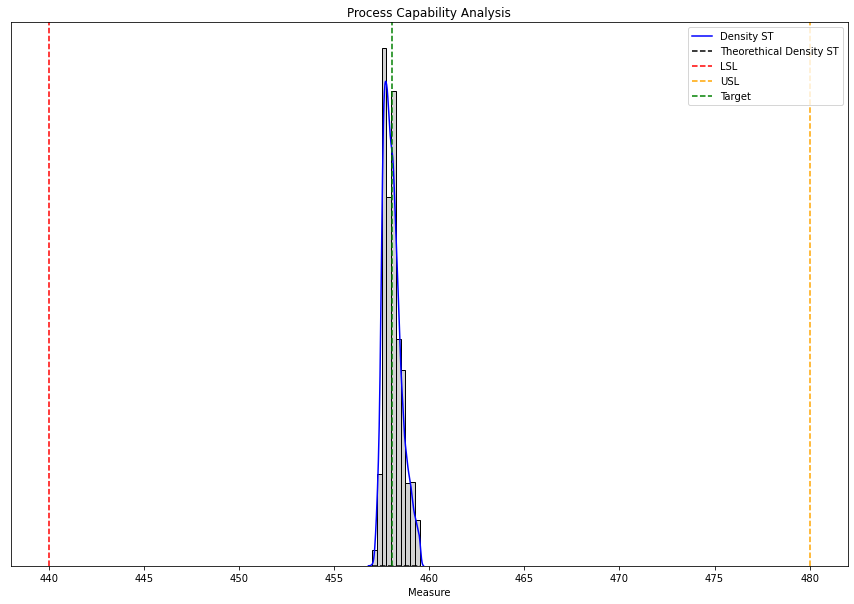

In [147]:
# Blue Wavelength 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['WD_B'].min()), (df4['WD_B'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['WD_B'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['WD_B'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_WB, linestyle="--", color="red", label="LSL")
plt.axvline(USL_WB, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_WB, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [148]:
# Calculate Cp
Cp = (USL_WB-LSL_WB)/(6*np.std(df4['WD_B']))

# Calculate Cpk
Cpk = min((USL_WB-df4['WD_B'].mean())/(3*df4['WD_B'].std()), (df4['WD_B'].mean()-LSL_WB)/(3*df4['WD_B'].std()))

# Calculate z-value
z = min((USL_WB-df4['WD_B'].mean())/(df4['WD_B'].std()), (df4['WD_B'].mean()-LSL_WB)/(df4['WD_B'].std()))

# Get data summary statistics
num_samples = len(df4['WD_B'])
sample_mean = df4['WD_B'].mean()
sample_std = df4['WD_B'].std()
sample_max = df4['WD_B'].max()
sample_min = df4['WD_B'].min()
sample_median = np.median(df4['WD_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_WB = len(df4['WD_B'][df4['WD_B'] < LSL_WB])/len(df4['WD_B'])*100
pct_above_USL_WB = len(df4['WD_B'][df4['WD_B'] > USL_WB])/len(df4['WD_B'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_WB}")
    print(f"LSL: {LSL_WB}")
    print(f"USL: {USL_WB}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_WB,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_WB,2)}%")

-----------------------------------
Specifications
Taget: 458.06352786391443
LSL: 440.0
USL: 480.0
-----------------------------------
Indices
Cp: 13.96
Cpk: 12.6
z: 37.81
-----------------------------------
Summary Statistics
Number of samples: 21282
Sample mean: 458.06
Sample std: 0.48
Sample max: 459.5
Sample min: 457.0
Sample median: 458.0
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%


### Forward Voltage _ Blue

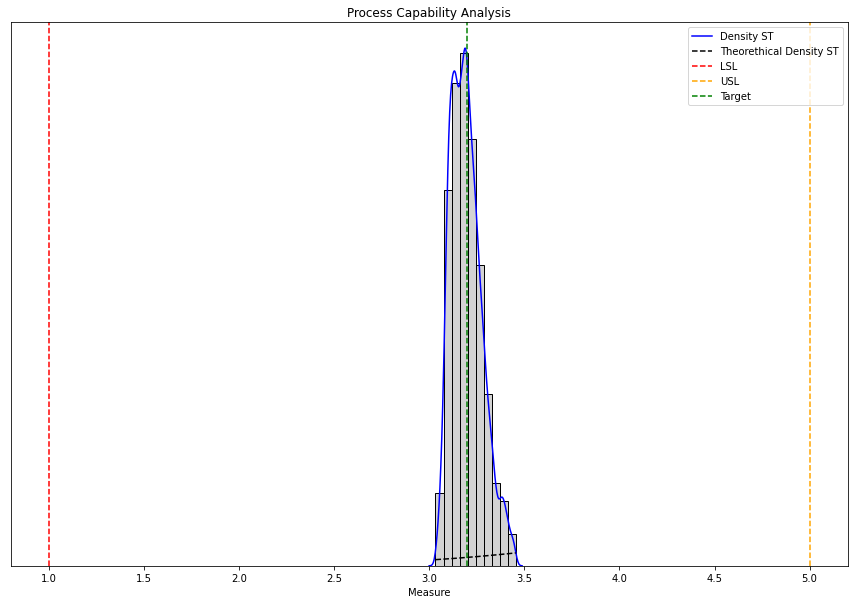

In [151]:
# Blue VF 특성의 공정 능력

# Generate probability density function 
x = np.linspace((df4['VF_B'].min()), (df4['VF_B'].max()), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(15,10))
plt.hist(df4['VF_B'], color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(df4['VF_B'], color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL_VB, linestyle="--", color="red", label="LSL")
plt.axvline(USL_VB, linestyle="--", color="orange", label="USL")
plt.axvline(MEAN_VB, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [153]:
# Calculate Cp
Cp = (USL_VB-LSL_VB)/(6*np.std(df4['VF_B']))

# Calculate Cpk
Cpk = min((USL_VB-df4['VF_B'].mean())/(3*df4['VF_B'].std()), (df4['VF_B'].mean()-LSL_VB)/(3*df4['VF_B'].std()))

# Calculate z-value
z = min((USL_VB-df4['VF_B'].mean())/(df4['VF_B'].std()), (df4['VF_B'].mean()-LSL_VB)/(df4['VF_B'].std()))

# Get data summary statistics
num_samples = len(df4['VF_B'])
sample_mean = df4['VF_B'].mean()
sample_std = df4['VF_B'].std()
sample_max = df4['VF_B'].max()
sample_min = df4['VF_B'].min()
sample_median = np.median(df4['VF_B'])

# Get percentage of data points outside of specification limits
pct_below_LSL_VB = len(df4['VF_B'][df4['VF_B'] < LSL_VB])/len(df4['VF_B'])*100
pct_above_USL_VB = len(df4['VF_B'][df4['VF_B'] > USL_VB])/len(df4['VF_B'])*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS")
    
    print("-----------------------------------")
    print(f"Specifications")
    print(f"Taget: {MEAN_VB}")
    print(f"LSL: {LSL_WB}")
    print(f"USL: {USL_WB}")    
    
    print("-----------------------------------")
    print(f"Indices")
    print(f"Cp: {round(Cp,2)}")
    print(f"Cpk: {round(Cpk,2)}")
    print(f"z: {round(z,2)}")
    
    print("-----------------------------------")
    print(f"Summary Statistics")
    print(f"Number of samples: {round(num_samples,2)}")
    print(f"Sample mean: {round(sample_mean,2)}")
    print(f"Sample std: {round(sample_std,2)}")
    print(f"Sample max: {round(sample_max,2)}")
    print(f"Sample min: {round(sample_min,2)}")
    print(f"Sample median: {round(sample_median,2)}")
    
    print(f"Percentage of data points below LSL: {round(pct_below_LSL_VB,2)}%")
    print(f"Percentage of data points above USL: {round(pct_above_USL_VB,2)}%")

-----------------------------------
Specifications
Taget: 3.196419180528141
LSL: 440.0
USL: 480.0
-----------------------------------
Indices
Cp: 8.2
Cpk: 7.39
z: 22.17
-----------------------------------
Summary Statistics
Number of samples: 21282
Sample mean: 3.2
Sample std: 0.08
Sample max: 3.46
Sample min: 3.03
Sample median: 3.19
Percentage of data points below LSL: 0.0%
Percentage of data points above USL: 0.0%
